In [ ]:
import pandas as pd
cleaned_nys_data = pd.read_csv('cleaned_nys_data.csv')

<ipython-input-20-1ccc642bdf8f>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_nys_data = pd.read_csv('cleaned_nys_data.csv')


In [ ]:
cleaned_nys_data.columns

Index(['action_taken', 'derived_race', 'derived_ethnicity', 'applicant_sex',
       'applicant_age', 'income', 'debt_to_income_ratio',
       'applicant_credit_score_type', 'loan_amount', 'loan_to_value_ratio',
       'interest_rate', 'rate_spread', 'loan_type', 'loan_purpose',
       'lien_status', 'property_value', 'occupancy_type',
       'tract_minority_population_percent', 'aus-1', 'denial_reason-1'],
      dtype='object')

In [ ]:
# Creating a table of variables and their description

from tabulate import tabulate

data = [
    ["action_taken", "Final decision made on the loan application (e.g., approved, denied)"],
    ["derived_race", "Race of the applicant as determined by the data system"],
    ["derived_ethnicity", "Ethnicity of the applicant as derived from application data"],
    ["applicant_sex", "Sex of the primary loan applicant"],
    ["applicant_age", "Age of the primary loan applicant"],
    ["income", "Applicant’s annual income (in dollars)"],
    ["debt_to_income_ratio", "Ratio of applicant's monthly debt payments to income"],
    ["applicant_credit_score_type", "Type of credit score used for the applicant"],
    ["loan_amount", "Total amount of the loan applied for"],
    ["loan_to_value_ratio", "Ratio of the loan amount to the appraised value of the property"],
    ["interest_rate", "Interest rate charged on the loan"],
    ["rate_spread", "Difference between the loan’s interest rate and the average prime offer rate"],
    ["loan_type", "Type of loan (e.g., conventional, FHA, VA, etc.)"],
    ["loan_purpose", "Purpose of the loan (e.g., home purchase, refinancing, etc.)"],
    ["lien_status", "Indicates whether the loan is a first or subordinate lien"],
    ["property_value", "Appraised value of the property backing the loan"],
    ["occupancy_type", "Indicates whether the property is owner-occupied, rental, etc."],
    ["tract_minority_population_percent", "Percentage of minority population in the census tract"],
    ["aus-1", "Automated Underwriting System used for the loan decision"],
    ["denial_reason-1", "Primary reason for denial if the loan was denied"]
]

headers = ["Variable Name", "Description"]
print(tabulate(data, headers=headers, tablefmt="grid"))


+-----------------------------------+------------------------------------------------------------------------------+
| Variable Name                     | Description                                                                  |
+===================================+==============================================================================+
| action_taken                      | Final decision made on the loan application (e.g., approved, denied)         |
+-----------------------------------+------------------------------------------------------------------------------+
| derived_race                      | Race of the applicant as determined by the data system                       |
+-----------------------------------+------------------------------------------------------------------------------+
| derived_ethnicity                 | Ethnicity of the applicant as derived from application data                  |
+-----------------------------------+---------------------------

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_to_plot = data

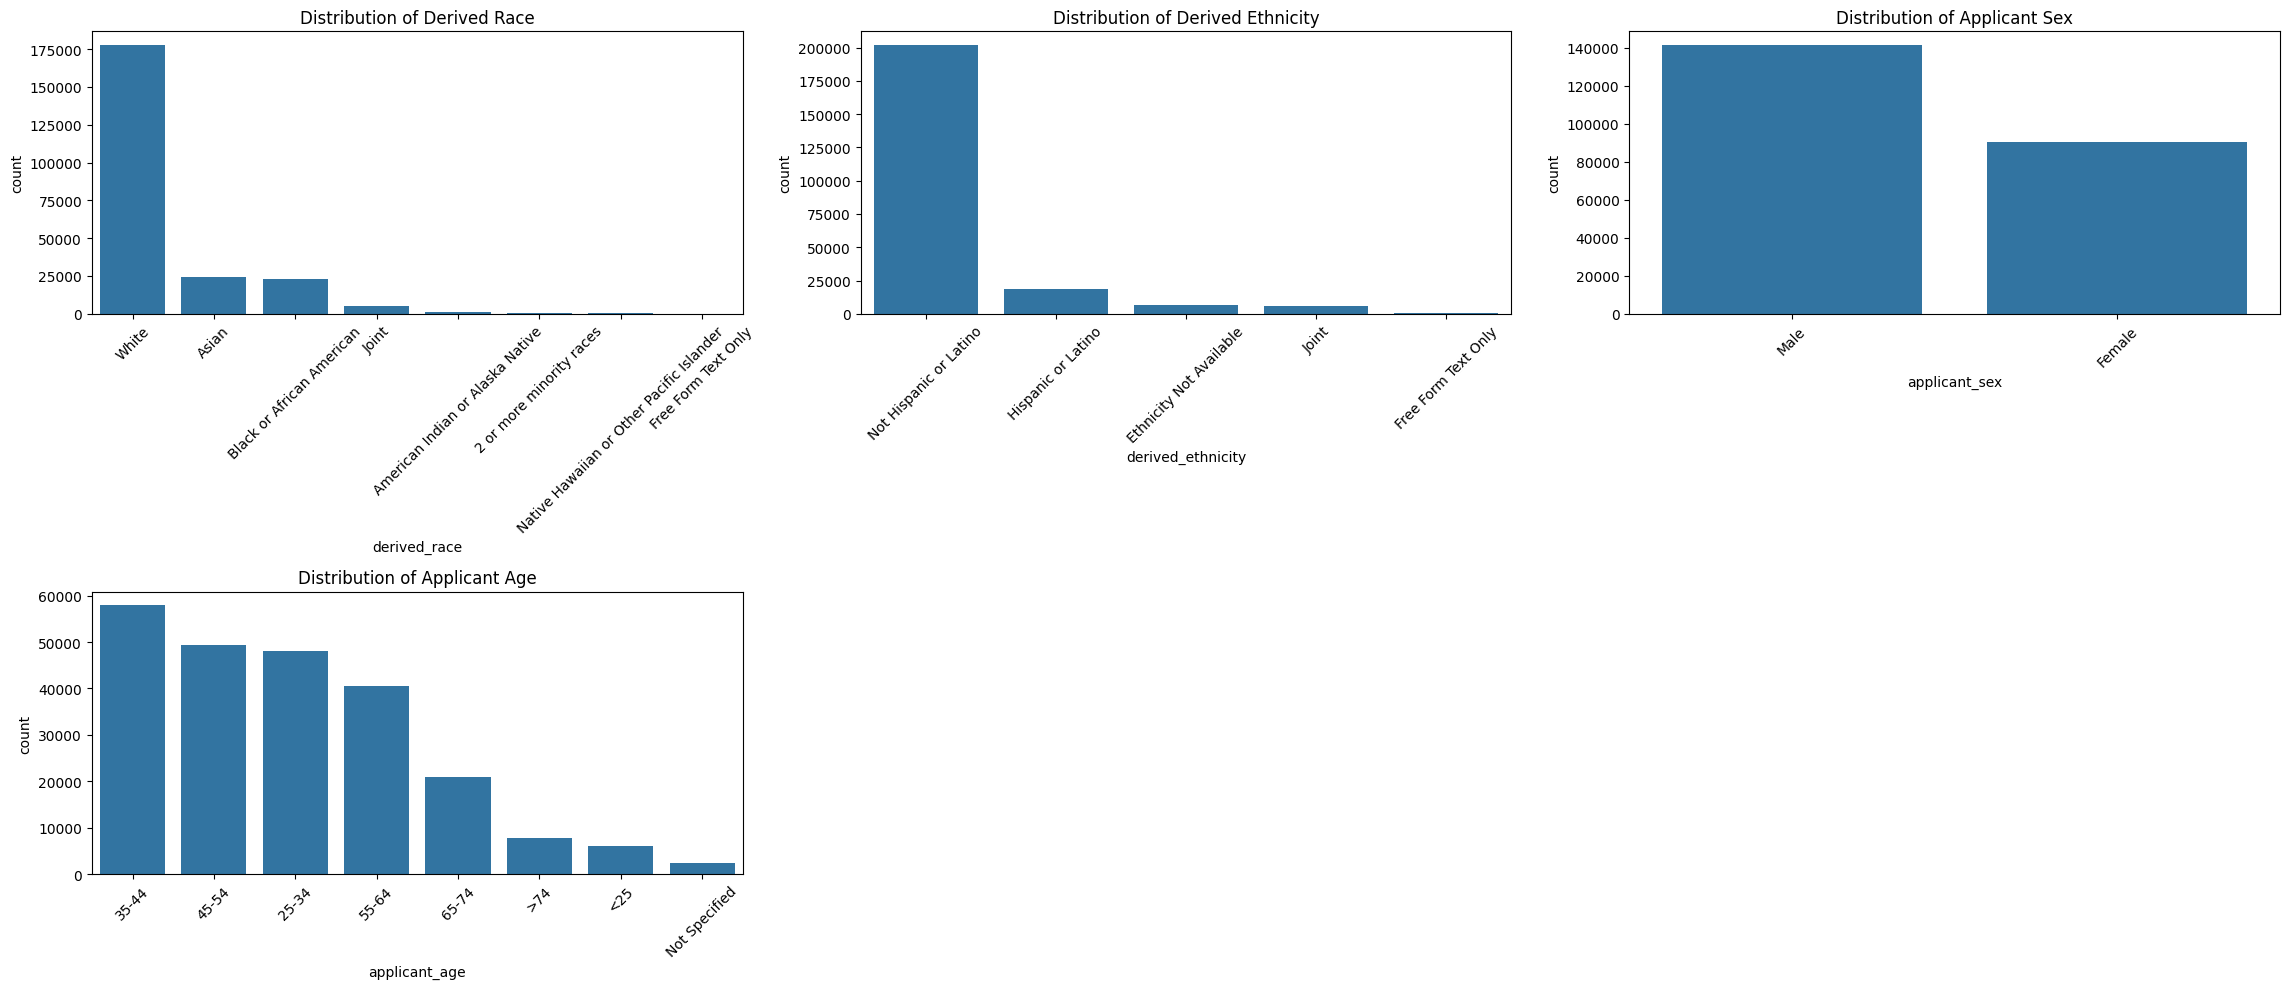

In [26]:
# Demographics plots: presenting the distribution of derived race, ethnicity, sex and age

# Variables to plot
categorical_vars = ['derived_race', 'derived_ethnicity', 'applicant_sex', 'applicant_age']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(23, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    data_to_plot = cleaned_nys_data.copy()

    if var == 'applicant_sex':
        # Keep only 1 (Male) and 2 (Female)
        data_to_plot = data_to_plot[data_to_plot['applicant_sex'].isin([1, 2])].copy()
        data_to_plot['applicant_sex'] = data_to_plot['applicant_sex'].map({1: 'Male', 2: 'Female'})
        order = ['Male', 'Female']
    elif var == 'applicant_age':
        # Replace 8888 with 'not specified'
        data_to_plot[var] = data_to_plot[var].replace('8888', 'Not Specified')
        order = data_to_plot[var].value_counts().index
    else:
        order = data_to_plot[var].value_counts().index

    sns.countplot(data=data_to_plot, x=var, ax=axes[i], order=order)
    axes[i].set_title(f"Distribution of {var.replace('_', ' ').title()}")
    axes[i].tick_params(axis='x', rotation=45)

# Removing unused plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()